(64, 64)


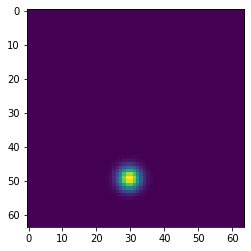

In [8]:
import numpy as np
import matplotlib.pyplot as plt

class Distribution():
    def __init__(self,mu,Sigma):
        self.mu = mu
        self.sigma = Sigma

    def two_d_gaussian(self,x):
        mu = self.mu
        Sigma =self.sigma
        n = mu.shape[0]
        Sigma_det = np.linalg.det(Sigma)
        Sigma_inv = np.linalg.inv(Sigma)
        N = np.sqrt((2*np.pi)**n*Sigma_det)

        fac = np.einsum('...k,kl,...l->...',x-mu,Sigma_inv,x-mu)

        Z = np.exp(-fac/2)/N
        Z = (Z-Z.min())/(Z.max()-Z.min())
        return Z


N = 64
X = np.linspace(0,N,N)
Y = np.linspace(0,N,N)
X,Y = np.meshgrid(X,Y)
x = 30
y = 50
mu = np.array([x,y])
Sigma = np.array([[5,0],[0,5]])
pos = np.empty(X.shape+(2,))
pos[:,:,0]= X
pos[:,:,1] = Y

p2 = Distribution(mu,Sigma)
Z = p2.two_d_gaussian(pos)

print(Z.shape)
plt.imshow(Z)
plt.show()

In [100]:
import torch
import torch.nn.functional as F
H = 3
W = 3
C = 3
J = 2
x = torch.ones(C,H,W)
x = torch.stack([x,x],0)
att = torch.Tensor(
    [[[1,1,1],
     [1,1,1],
     [1,1,1]],
     [[2,2,2],
      [2,2,2],
      [2,2,2]]])
# att = att.view(J,-1)
# att = F.softmax(att,1)
# att = att.view(J,H,W)
# print(att)
att = torch.stack([att,att],0)
f_list = []
for i in range(att.size(1)):
    f = x*(att[:,i,:,:]).unsqueeze(1)
    print(f.size())
    f = F.adaptive_avg_pool2d(f,[1,1]).squeeze()
    f_list.append(f)
F = torch.stack(f_list,2)
# C,H,W = x.size()
# x = x.view(C,-1)
# att = att.permute(1,2,0).contiguous().view(-1,J)
# f = torch.matmul(x,att)
# f = f/(H*W)
print(F)

torch.Size([2, 3, 3, 3])
torch.Size([2, 3, 3, 3])
tensor([[[1., 2.],
         [1., 2.],
         [1., 2.]],

        [[1., 2.],
         [1., 2.],
         [1., 2.]]])


In [2]:
a = np.array([[2,3],[1,2]])
b = np.array([1,2])
a/b

array([[2. , 1.5],
       [1. , 1. ]])